### Polynomia Regression

In statistics, polynomial regression is a form of regression analysis in which the relationship between the independent variable x and dependent variable y is modelled as an nth degree polynomial in x

In simple words, it is used for complex data, where relationship among data points is not a straight line

<img src='poly.png' style="height:250px">
x
deg = 2
x**0  x**1  x**2

### Load Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Generate random data

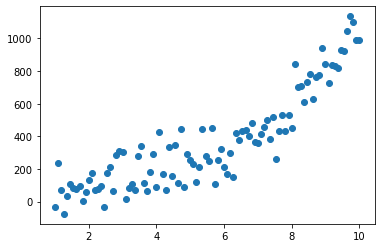

In [6]:
X = np.linspace(1,10,100)
m = np.random.randn(100)
Y = X**3+m*100+100
plt.scatter(X,Y)

### Lets try to draw regression line using linear regression

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [8]:
X.shape

(100,)

In [9]:
X = X.reshape(-1,1)
print(X.shape)

(100, 1)


In [10]:
lr = LinearRegression()
lr.fit(X,Y)

LinearRegression()

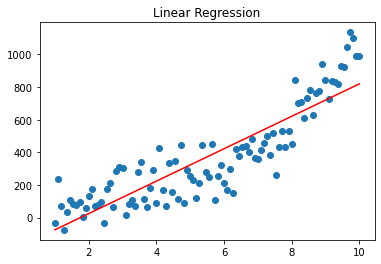

In [11]:
ypred = lr.predict(X)
plt.scatter(X,Y)
plt.plot(X,ypred,c="red")
plt.title("Linear Regression")
plt.show()

In [12]:
r2_score(Y,ypred)

0.7747046527772382

### Polynomial Regression

In [13]:
X.shape

(100, 1)

In [14]:
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X)

PolynomialFeatures()

In [16]:
poly_x = poly_reg.transform(X)
poly_x.shape

(100, 3)

In [17]:
print(X[:3])

[[1.        ]
 [1.09090909]
 [1.18181818]]


In [18]:
1.09090909**2

1.1900826426446283

In [20]:
1.18181818**2

1.3966942105785125

In [19]:
print(poly_x[:3])

[[1.         1.         1.        ]
 [1.         1.09090909 1.19008264]
 [1.         1.18181818 1.39669421]]


In [21]:
poly_reg = LinearRegression()
poly_reg.fit(poly_x,Y)
poly_pred = poly_reg.predict(poly_x)

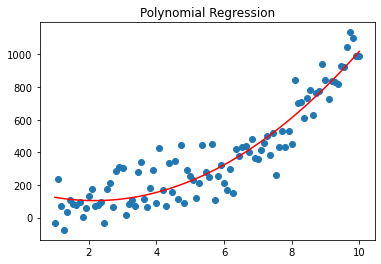

In [22]:
plt.scatter(X,Y)
plt.plot(X,poly_pred,c="red")
plt.title("Polynomial Regression")
plt.show()

### Evaluation

In [23]:
lin_score = r2_score(Y, ypred)
poly = r2_score(Y, poly_pred)

print("Linear Regression: ", lin_score)
print("Polynomial Regression: ", poly)

Linear Regression:  0.7747046527772382
Polynomial Regression:  0.8707944069179883


Text(0.5, 1.0, 'With Polynomial Features')

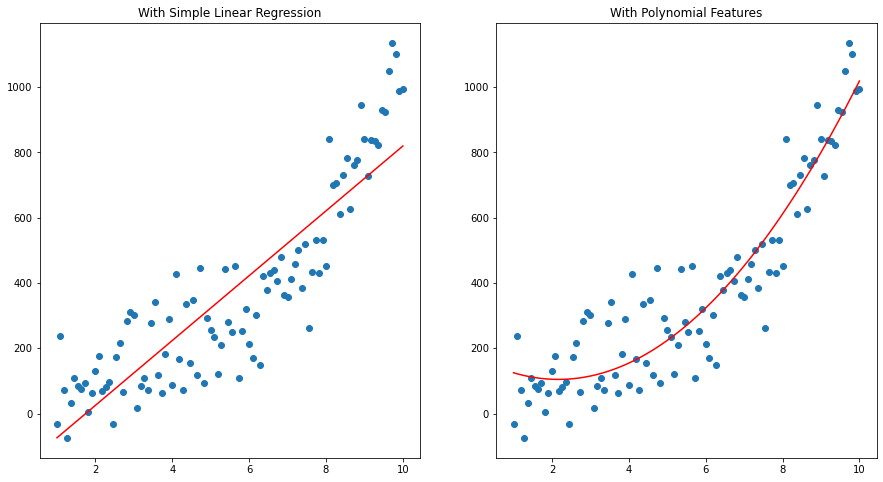

In [24]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.scatter(X,Y)
plt.plot(X,ypred,c="red")
plt.title("With Simple Linear Regression")

plt.subplot(1,2,2)
plt.scatter(X,Y)
plt.plot(X,poly_pred,c="red")
plt.title("With Polynomial Features")